In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm

In [5]:
def findarg(data, value):
    arg = 0
    for wl in data:
        if wl<value:
            arg = arg + 1
        else:
            return arg
        
    return arg

In [6]:
gr1 = pd.read_csv('gr1.csv')
sin = pd.read_csv('sin.csv')
sio= pd.read_csv('sio.csv')

In [7]:
def bkg_norm(data):
    return (data['i']-data['i'][0])/(data['i'][np.argmax(data['i'][findarg(data['w'], 612):findarg(data['w'], 616)])])

(0.0, 5.0)

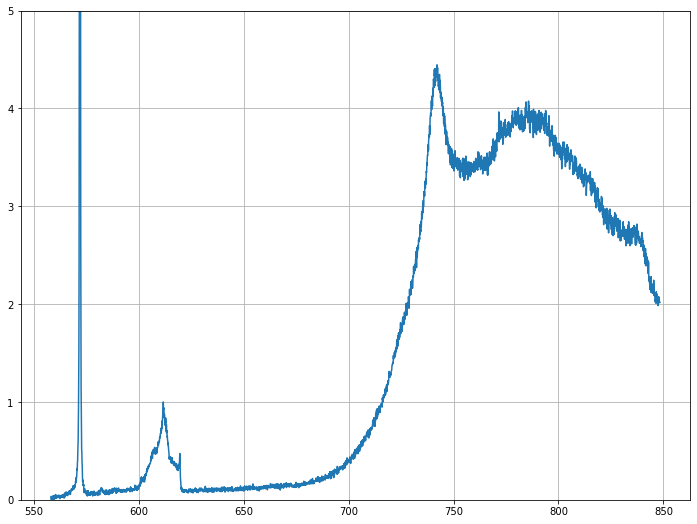

In [8]:
plt.figure(figsize=(12,9))
plt.grid()
y1 = gr1['i']-gr1['i'][np.argmin(gr1['i'])]
value = max((y1[findarg(gr1['w'],612):findarg(gr1['w'],616)]))
y1 = y1/value
y1[findarg(gr1['w'],624.4)]= y1[findarg(gr1['w'],624.2)]
x1 = gr1['w']-1.8
plt.plot(x1,y1)
plt.ylim([0,5])

(0.0, 5.0)

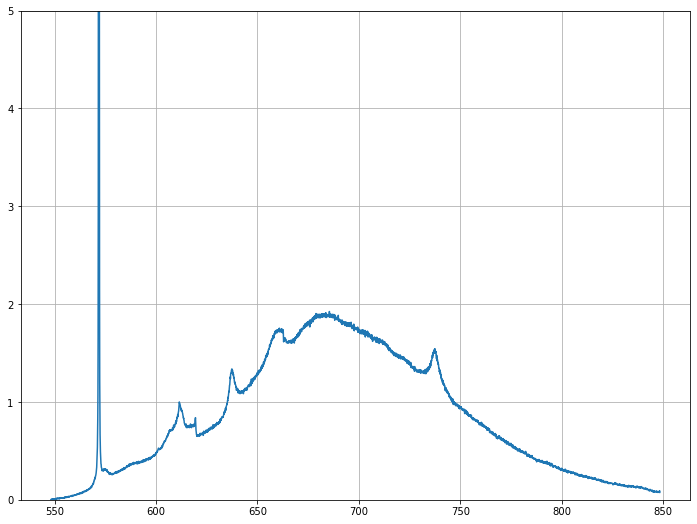

In [9]:
plt.figure(figsize=(12,9))
plt.grid()
y2 = sin['i'].copy()    
y2 = y2-y2[np.argmin(y2)]
value = max((y2[findarg(sin['w'],612):findarg(sin['w'],616)]))
y2 = y2/value
x2 = sin['w']-1.8
plt.plot(x2,y2)
plt.ylim([0,5])

(0.0, 3000.0)

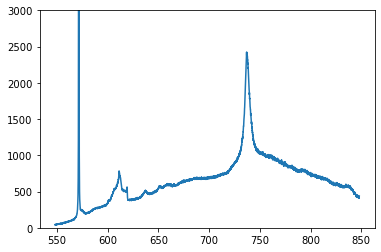

In [10]:
plt.plot(sio['w']-2,sio['i'])
plt.ylim([0,3000])

(0.0, 5.0)

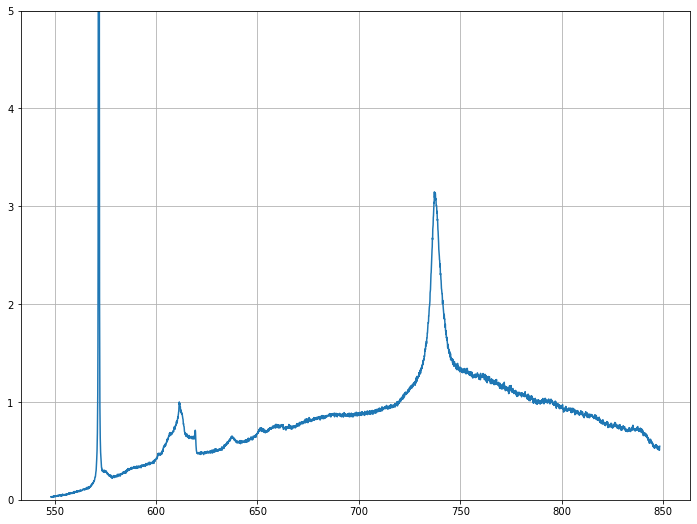

In [11]:
plt.figure(figsize=(12,9))
plt.grid()
y3 = sio['i']-sin['i'][np.argmin(sio['i'])]
value = max((y3[findarg(sio['w'],612):findarg(sio['w'],616)]))
y3 = y3/value
x3 = sin['w']-1.8
plt.plot(x3,y3)
plt.ylim([0,5])

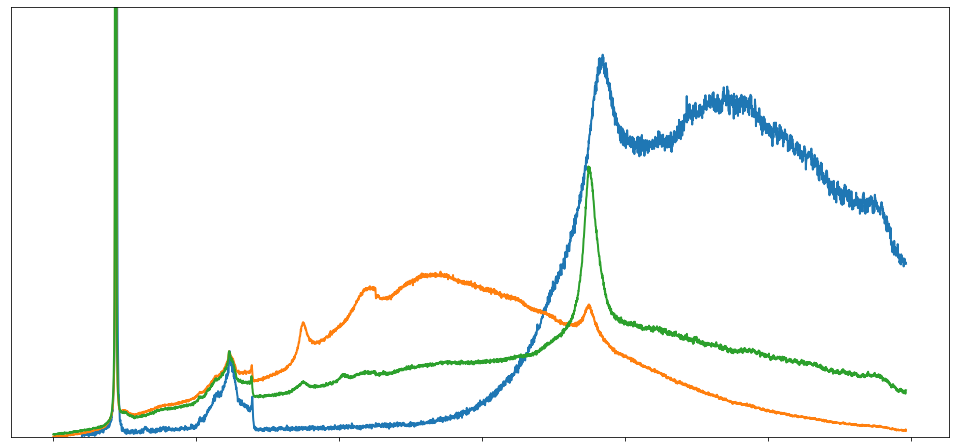

In [12]:
plt.rcParams.update({'font.size': 22})
cm = 1/2.54 
fig = plt.figure(figsize=(42.69*cm, 20.11*cm))
plt.plot(x1[20:],y1[20:],linewidth=2)
plt.plot(x2[20:],y2[20:], linewidth=2)
plt.plot(x3[20:],y3[20:], linewidth=2)
plt.ylim([0,5])
plt.yticks([])
plt.xticks([550,600,650,700,750,800,850],['','','','','','',''])
fig.savefig('RTspectrum_regular.svg', format= 'svg',transparent=True)